In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("DKI Jakarta.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       349 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     363 non-null    float64       
 4   RH_avg   363 non-null    float64       
 5   RR       288 non-null    float64       
 6   ss       360 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-9730db86a394>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.8,29.8,38.0,25.9
1,2023-02-01,23.4,30.0,134.4,27.2
2,2023-03-01,25.0,29.0,0.7,26.7
3,2023-04-01,24.6,30.6,3.2,27.0
4,2023-05-01,23.6,31.6,31.3,27.5
...,...,...,...,...,...
360,2023-12-16,27.0,34.2,NaN,30.5
361,2023-12-17,26.8,33.8,0.0,30.4
362,2023-12-18,27.2,34.0,0.0,30.7
363,2023-12-19,27.0,34.4,0.0,30.3


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.8,29.8,38.0,25.9
1,31,31,2023-01-02,26.4,29.8,0.4,27.5
2,59,60,2023-01-03,25.0,29.4,11.0,26.7
3,90,92,2023-01-04,26.2,31.0,0.0,28.1
4,120,123,2023-01-05,27.2,31.0,0.0,28.8
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,27.0,34.2,NaN,30.5
350,350,361,2023-12-17,26.8,33.8,0.0,30.4
351,351,362,2023-12-18,27.2,34.0,0.0,30.7
352,352,363,2023-12-19,27.0,34.4,0.0,30.3


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         15
Tx          2
RR         73
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

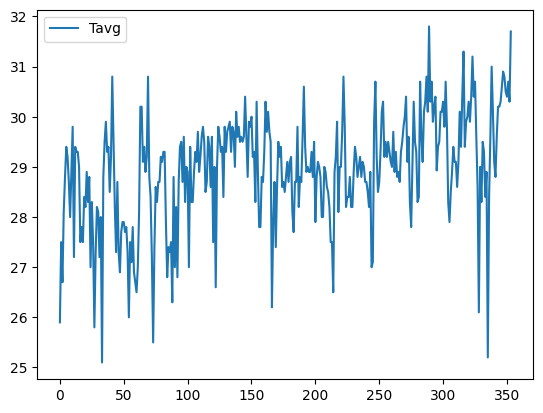

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

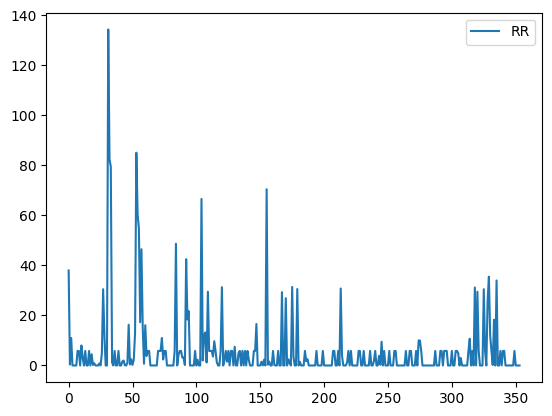

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    print(row)

level_0                      1
index                        1
Tanggal    2023-02-01 00:00:00
Tn                        23.4
Tx                        30.0
RR                       134.4
Tavg                      27.2
Name: 31, dtype: object
level_0                     32
index                       33
Tanggal    2023-02-02 00:00:00
Tn                        24.4
Tx                        30.6
RR                        82.5
Tavg                      28.0
Name: 32, dtype: object
level_0                     53
index                       54
Tanggal    2023-02-23 00:00:00
Tn                        24.4
Tx                        30.2
RR                        85.1
Tavg                      27.3
Name: 53, dtype: object


In [14]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

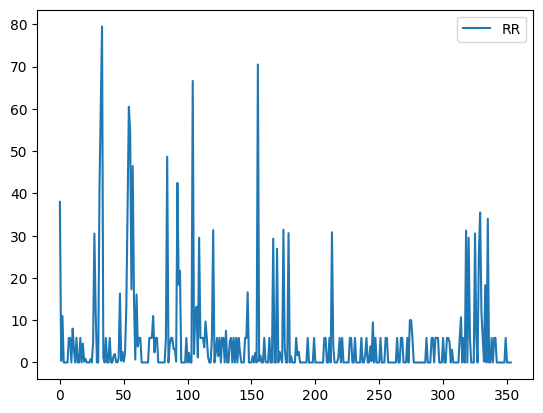

In [15]:
df1[['RR']].plot()

In [16]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.8,29.8,38.000000,25.9,29.8,27.5,0.4
1,31,31,2023-01-02,26.4,29.8,0.400000,27.5,29.4,26.7,11.0
2,59,60,2023-01-03,25.0,29.4,11.000000,26.7,31.0,28.1,0.0
3,90,92,2023-01-04,26.2,31.0,0.000000,28.1,31.0,28.8,0.0
4,120,123,2023-01-05,27.2,31.0,0.000000,28.8,32.4,29.4,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,27.0,34.2,5.816726,30.5,33.8,30.4,0.0
350,350,361,2023-12-17,26.8,33.8,0.000000,30.4,34.0,30.7,0.0
351,351,362,2023-12-18,27.2,34.0,0.000000,30.7,34.4,30.3,0.0
352,352,363,2023-12-19,27.0,34.4,0.000000,30.3,33.6,31.7,0.0


In [17]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.4
1,0.400000,27.5,26.7,11.0
2,11.000000,26.7,28.1,0.0
3,0.000000,28.1,28.8,0.0
4,0.000000,28.8,29.4,0.0
...,...,...,...,...
349,5.816726,30.5,30.4,0.0
350,0.000000,30.4,30.7,0.0
351,0.000000,30.7,30.3,0.0
352,0.000000,30.3,31.7,0.0


In [18]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.400000
1,0.400000,27.5,26.7,11.000000
2,11.000000,26.7,28.1,0.000000
3,0.000000,28.1,28.8,0.000000
4,0.000000,28.8,29.4,0.000000
...,...,...,...,...
348,0.000000,30.8,30.5,5.816726
349,5.816726,30.5,30.4,0.000000
350,0.000000,30.4,30.7,0.000000
351,0.000000,30.7,30.3,0.000000


In [19]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,38.000000,25.9,27.5,0.400000,0
1,0.400000,27.5,26.7,11.000000,1
2,11.000000,26.7,28.1,0.000000,2
3,0.000000,28.1,28.8,0.000000,3
4,0.000000,28.8,29.4,0.000000,4
...,...,...,...,...,...
348,0.000000,30.8,30.5,5.816726,348
349,5.816726,30.5,30.4,0.000000,349
350,0.000000,30.4,30.7,0.000000,350
351,0.000000,30.7,30.3,0.000000,351


In [21]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [22]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [23]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
X_test

,Indeks,Tavg
282,282,30.7
283,283,29.6
284,284,29.1
285,285,30.1
286,286,30.3
...,...,...
348,348,30.8
349,349,30.5
350,350,30.4
351,351,30.7


In [25]:
#testing
pred1 = lr.predict(X_test)
pred1

array([29.92663667, 29.42989515, 29.20522118, 29.66071608, 29.75345425,
       29.9822262 , 29.66686305, 30.4397701 , 29.76165021, 29.94507756,
       29.58436982, 29.72245258, 29.81519075, 29.15043018, 29.36584281,
       29.41323639, 29.68735293, 29.68940192, 29.78214009, 29.55746612,
       29.96761644, 29.5615641 , 28.88344421, 28.70411483, 28.97823137,
       29.16165873, 29.39043068, 29.25644589, 29.25849488, 29.03382091,
       29.26259285, 29.71808776, 29.40272461, 29.85821951, 30.26836983,
       29.40887157, 29.63764352, 29.6850371 , 29.82311986, 29.64379048,
       29.87256243, 30.23736815, 29.87666041, 30.01474317, 29.51800165,
       29.06660472, 27.93503892, 29.25208107, 28.93671791, 29.482902  ,
       29.39426181, 28.98820947, 29.21698142, 27.54128051, 28.99435644,
       29.54054052, 30.1774138 , 29.77136146, 29.31996453, 29.18597974,
       29.55078547, 29.82490201, 29.82695099, 29.87434457, 30.01242734,
       30.1505101 , 30.1072145 , 29.97322971, 29.92993411, 30.06

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.695614399669683 0.9004332842573008


In [27]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,30.7
283,283,29.6
284,284,29.1
285,285,30.1
286,286,30.3
...,...,...
348,348,30.8
349,349,30.5
350,350,30.4
351,351,30.7


In [28]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,29.926637
283,29.429895
284,29.205221
285,29.660716
286,29.753454
...,...
348,30.107214
349,29.973230
350,29.929934


In [29]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-29-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.9,NaN
1,27.5,NaN
2,26.7,NaN
3,28.1,NaN
4,28.8,NaN
...,...,...
348,30.8,30.107214
349,30.5,29.973230
350,30.4,29.929934
351,30.7,30.068017


<Axes: >

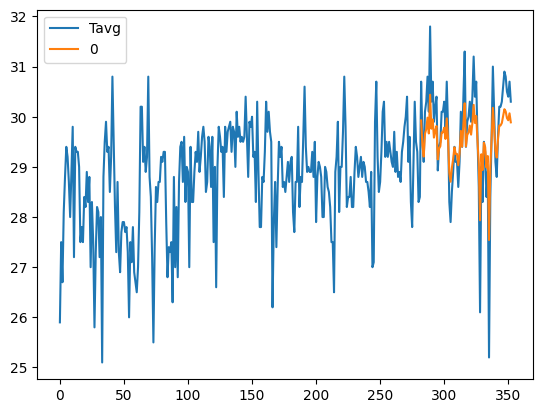

In [30]:
kan.plot()

In [31]:
new_data = [[354,30.3],[355,30.3],[356,30.3],[357,30.3],[358,30.3],[359,30.3],[360,30.3]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.89278547, 29.89483446, 29.89688345, 29.89893244, 29.90098142,
       29.90303041, 29.9050794 ])

In [32]:
kan.to_json('Prediksi DKI Jakarta.json')